<a href="https://colab.research.google.com/github/Kontrabass2018/DeepLearningGPU/blob/main/GPU_computing_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-12-13 07:58:45 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/lib64-nvidia
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  470.139 ms (2 allocations: 32.00 MiB)


In [3]:
# only first time!
using Pkg
#Pkg.add("CUDA")
Pkg.add("Flux")
Pkg.add("HDF5")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed DiffRules ────────────── v1.15.1
   Installed GPUArraysCore ────────── v0.1.5
   Installed IrrationalConstants ──── v0.2.2
   Installed Adapt ────────────────── v3.7.2
   Installed Transducers ──────────── v0.4.84
   Installed IRTools ──────────────── v0.4.14
   Installed Flux ─────────────────── v0.13.17
   Installed RealDot ──────────────── v0.1.0
   Installed Accessors ────────────── v0.1.39
   Installed PtrArrays ────────────── v1.2.1
   Installed DiffResults ──────────── v1.1.0
   Installed Functors ─────────────── v0.4.12
   Installed ShowCases ────────────── v0.1.0
   Installed ArgCheck ─────────────── v2.4.0
   Installed ContextVariablesX ────── v0.1.3
   Installed FLoopsBase ───────────── v0.1.1
   Installed PDMats ───────────────── v0.11.31
   Installed Setfield ─────────────── v1.1.1
   Installed CUDA_Driver_jll ──────── v0.5.0+1
   Installed cuDNN ────────────────── v1.

In [1]:
using CUDA
using Flux


┌ Error: cuDNN is not available for your platform (x86_64-linux-gnu-libgfortran5-cxx11-libstdcxx29-cuda+none-julia_version+1.8.2)
└ @ cuDNN ~/.julia/packages/cuDNN/dAoBn/src/cuDNN.jl:160


## Importing Data

In [2]:
using Random
using HDF5
function load_tcga_data(infilename; shfl = true)
    infile = h5open(infilename)
    TCGA_data = infile["data"][:,:]
    labs = string.(infile["labels"][:])
    samples = string.(infile["samples"][:])
    genes = string.(infile["genes"][:])
    biotypes = string.(infile["biotypes"][:])
    close(infile)
    ids = collect(1:size(labs)[1])
    shfl && (ids = shuffle(ids))
    return TCGA_data[ids,:], labs[ids], samples[ids], genes, biotypes
end

function fetch_data(filename; shfl = true)
    if !(filename in readdir("."))
        # Define the URL`
        tcga_data_url = "https://bioinfo.iric.ca/~sauves/VARIA/$filename"

        # Escape the URL to handle special characters
        escaped_url = Base.shell_escape(tcga_data_url)

        # Construct and execute the wget command
        command = `wget $escaped_url`
        run(command)
    end
    load_tcga_data(filename; shfl = shfl)

end

fetch_data (generic function with 1 method)

In [4]:
infilename = "TCGA_TPM_lab.h5"
TCGA_data, labels, samples, genes, biotypes = fetch_data(infilename)

([1.024218769623556 0.1692628640864461 … 0.011401259924743891 0.39527395998698006; 1.7593641100122193 0.0 … 0.01211983580451332 0.3905818785504353; … ; 1.7500236894153733 0.0 … 0.012837224705172217 0.4251427878607661; 1.6111995028153783 0.0 … 0.012921545544560138 0.2390490931401915], ["TCGA-BRCA", "TCGA-BRCA", "TCGA-CHOL", "TCGA-ESCA", "TCGA-KIRP", "TCGA-PRAD", "TCGA-THYM", "TCGA-LUAD", "TCGA-THCA", "TCGA-PCPG"  …  "TCGA-LUSC", "TCGA-BLCA", "TCGA-LUAD", "TCGA-BLCA", "TCGA-LUSC", "TCGA-THYM", "TCGA-STAD", "TCGA-LUAD", "TCGA-LUSC", "TCGA-BRCA"], ["db55d9d9-dd56-4ca9-b1f1-0d929697b280", "c4699748-f01d-4b30-9c74-1ca77fb84ac1", "bc15cec4-1f82-47fe-ae69-3853194fab7e", "29da08f4-c9e2-4e7a-9733-b4ec5b9c5f13", "42d044ae-1416-477d-ac80-779c49bc8d35", "e8f39c9e-0f1a-401c-9055-762b52bc77c7", "51abe033-5fb4-49b5-89ef-c44d0bb1ab00", "8e2aca86-7cba-4631-9f25-4d14219dbc6d", "63b01b43-a68a-4046-89b0-736ba4d08504", "da094e20-df07-4efa-892c-33f4ac5c3056"  …  "947b20ae-f6e3-497d-96d6-db0b9cab3c5a", "ce4e4

# Coding an SVD implementation in Julia on GPU

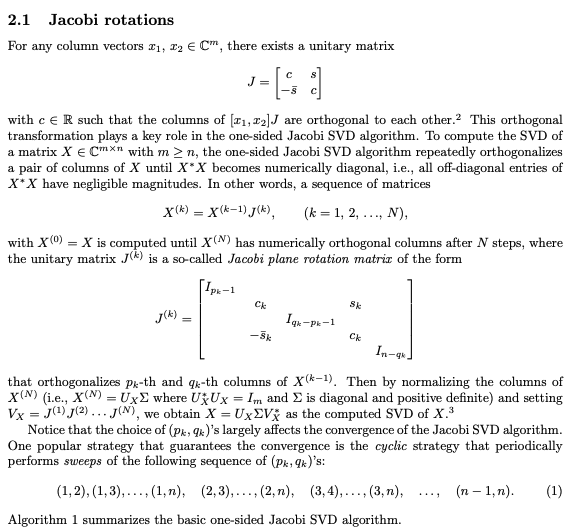

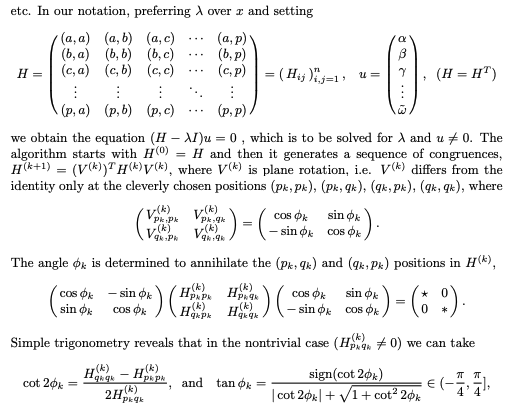

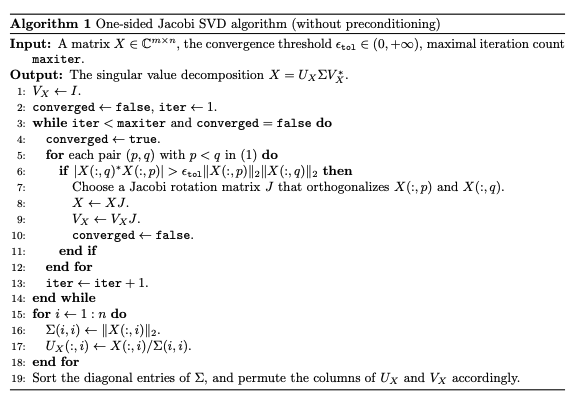

SVD algorithm as presented in this article https://arxiv.org/pdf/2209.04626

## CPU implementation

In [9]:


using Statistics
using LinearAlgebra

function fit_transform_pca(X, outdim)
    x_means =  mean(X, dims =2 )
    Z = X .- x_means
    U, S, V = svd(Z,full=true);
    Matrix(U[:, sortperm(S, rev=true)[1:outdim]]') * Z
end
function fit_pca(X, outdim)
    x_means =  mean(X, dims =2 )
    Z = X .- x_means
    U, S, V = svd(Z,full=true);
    return Matrix(U[:, sortperm(S, rev=true)[1:outdim]]')
end
function transform_pca(X, P)
    x_means =  mean(X, dims =2 )
    Z = X .- x_means
    P * Z
end




transform_pca (generic function with 1 method)

In [ ]:
X_tr = fit_transform_pca(TCGA_data',500)

## GPU implementation

In [ ]:
X = TCGA_data[:,biotypes .== "protein_coding"] |>gpu

In [5]:
function fit_transform_pca(X, outdim, device=gpu)
    x_means =  mean(X |> device, dims =2 )
    Z = X .- x_means
    U, S, V = svd_jacobi(Z,full=true);
    Matrix(U[:, sortperm(S, rev=true)[1:outdim]]') * Z
end

fit_transform_pca (generic function with 2 methods)

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />